# Open Government Data, Canton Zurich

### **Dataset**: COVID_19 Massnahmen im Kanton Zürich

### **Description**: Geltende Massnahmen auf dem Gebiet des Kantons Zürich sowie Schulferienzeiten im Bezirk Zürich. Spaltenüberschriften: 'Datum' = Beginn der Massnahme; 'Raum' = Gebiet auf das sich die Massnahme resp. Schulferienzeit bezieht; 'Kategorisierung' = Art der Massnahme (bzw. Schulferien)

*Autogenerated Jupyter Notebook and basic Python code for data set* **707@statistisches-amt-kanton-zuerich**.

## Dataset profile
- **Issued** `2020-11-06T00:00:00`
- **Modified** `2022-02-24T11:29:57`
- **Startdate** `2020-02-28`
- **Enddate** `2022-02-03`
- **Theme** `['Kriminalität, Strafrecht', 'Gesundheit', 'Mobilität und Verkehr']`
- **Keyword** `['bezirke', 'gastgewerbe', 'gewerbe', 'kanton_zuerich', 'oeffentlicher_verkehr', 'schulen', 'corona', 'sars-cov-2', 'mobilitaet', 'covid19', 'ogd']`
- **Publisher** `['Statistisches Amt des Kantons Zürich']`
- **Landingpage** `https://www.zh.ch/de/gesundheit/coronavirus/zahlen-fakten-covid-19.html?keyword=covid19`


## Import Python modules

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [14]:
# Distribution 0
# Ktzhdistid               : 1745
# Title                    : COVID_19 Massnahmen im Kanton Zürich
# Description              : None
# Issued                   : 2020-11-06T17:05:03
# Modified                 : 2022-02-24T11:29:57
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://raw.githubusercontent.com/statistikZH/covid19zeitmarker/master/covid19zeitmarker.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://raw.githubusercontent.com/statistikZH/covid19zeitmarker/master/covid19zeitmarker.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [15]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [16]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 51 rows (observations) and 5 columns (variables).
There seem to be 0 exact duplicates in the data.


In [17]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Datum            51 non-null     object
 1   Raum             51 non-null     object
 2   Kategorisierung  51 non-null     object
 3   Beschreibung     51 non-null     object
 4   Link             51 non-null     object
dtypes: object(5)
memory usage: 25.4 KB


In [18]:
df.head()

,Datum,Raum,Kategorisierung,Beschreibung,Link
0,2020-02-28,CH,Ausweitung,Besondere Lage: Verbot Grossveranstaltungen,https://www.admin.ch/gov/de/start/dokumentatio...
1,2020-03-13,CH,Ausweitung,Schulen geschlossen,https://www.admin.ch/gov/de/start/dokumentatio...
2,2020-03-17,CH,Ausweitung,"Schliessung von Läden Märkten, Restaurationsbe...",https://www.admin.ch/gov/de/start/dokumentatio...
3,2020-04-27,CH,Lockerung,"Erste Lockerungen: Coiffeure, Gartencenter etc.",https://www.admin.ch/gov/de/start/dokumentatio...
4,2020-05-11,CH,Lockerung,"Lockerung: Unterricht, in oblig. Schulen, Rest...",https://www.bag.admin.ch/bag/de/home/das-bag/a...


In [19]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,11,5,20
Datum,2020-10-19,2020-06-06,2021-04-19
Raum,CH,CH,CH
Kategorisierung,Ausweitung,Lockerung,Lockerung
Beschreibung,"Einheitliche Maskenpflicht, Home-Office empfo...","Lockerung: Clubs, Theater, Camping etc.","Öffnung von Terrassen, Veranstaltungen bis 50 ..."
Link,https://www.bag.admin.ch/bag/de/home/das-bag/a...,https://www.admin.ch/gov/de/start/dokumentatio...,https://www.admin.ch/gov/de/start/dokumentatio...


In [20]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,Datum,Raum,Kategorisierung,Beschreibung,Link
count,51,51,51,51,51
unique,50,3,3,39,32
top,2021-12-20,CH,Ferien,Sommerferien Ende,https://www.zh.ch/content/dam/zhweb/bilder-dok...
freq,2,26,22,3,10


In [21]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    try:
        display(df.describe(include='number'))
    except:
        pass

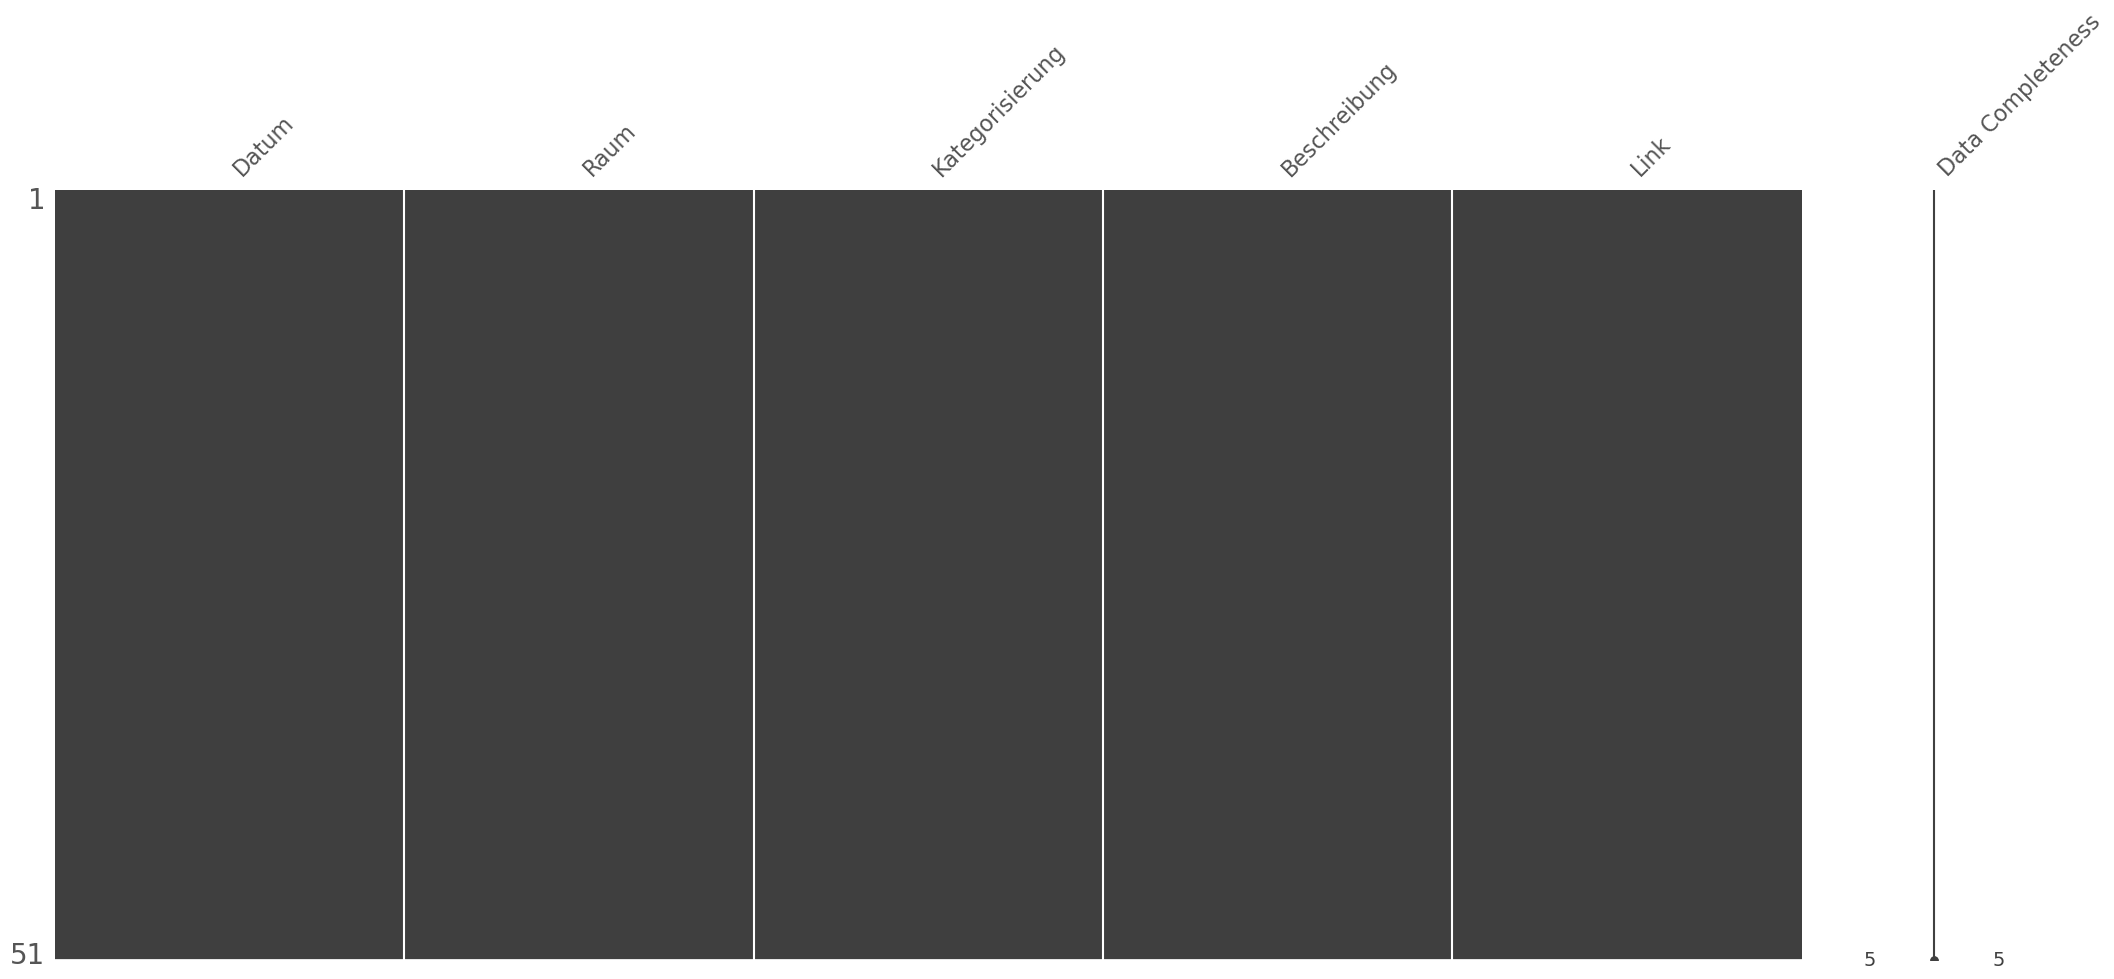

In [22]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

In [23]:
# plot a histogram for each numerical feature
try:
    df.hist(bins=25, layout=(-1, 5), edgecolor='black');
except:
    pass

In [24]:
# continue your code here...

**Contact**: Statistisches Amt des Kantons Zürich | Data Shop | datashop@statistik.zh.ch